In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/full_survey_data.csv')

/var/folders/b3/glj_22g92pl25nkdvjvxnzz00000gn/T/ipykernel_7581/4096187165.py:1: DtypeWarning: Columns (10,11,12,15,16,17,18,19,20,21,22,24,27,37,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,69,74,75,76,78,88,91,94,95,104,113,114,115,116,118,121,122,123,124,125,132,135,137,138,141,142,151,160,161,162,163,165,168,169,170,171,172,179,182,184,185,188,189,198,207,208,209,210,212,215,216,217,218,219,226,229,231,232,236,245,254,255,256,257,259,262,263,264,265,266,273,276,278,279,283,292,301,302,303,304,306,309,310,312,313,320,325,326,330,339,348,349,350,351,353,356,357,359,360,367,372,373,377,386,395,396,397,398,400,403,404,406,407,414,419,420,424,433,443,444,445,446,447,448,450,451,452,453,454,455,456,458,459,460,461,462,463,464,465,466,467,469,470,471,472,473,474,475,476,478,479,480,481,482,500,501,502,508,510,515,516,522,524,525,526,533,538,547,556,561,565,566,567,574,580,581,582,591,600,603,607,608,609,616,620,624,633,680,681,682,687,688,694,696,697,698,705,710

<Axes: title={'center': 'Survey Responses by Year'}, xlabel='year'>

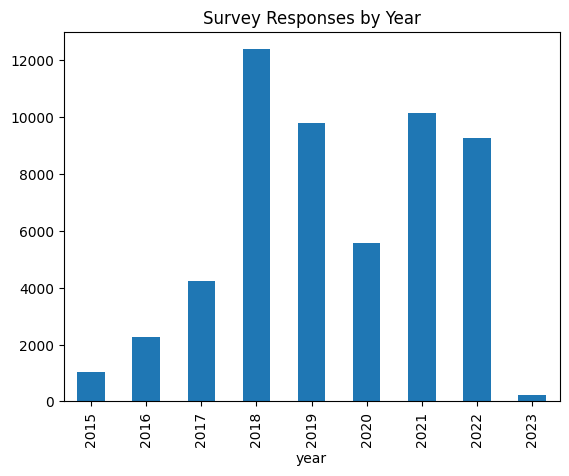

In [3]:
df.year.value_counts().sort_index().plot(kind='bar', title='Survey Responses by Year')

<Axes: title={'center': 'Observations by Country and Year'}, xlabel='iso_country_code'>

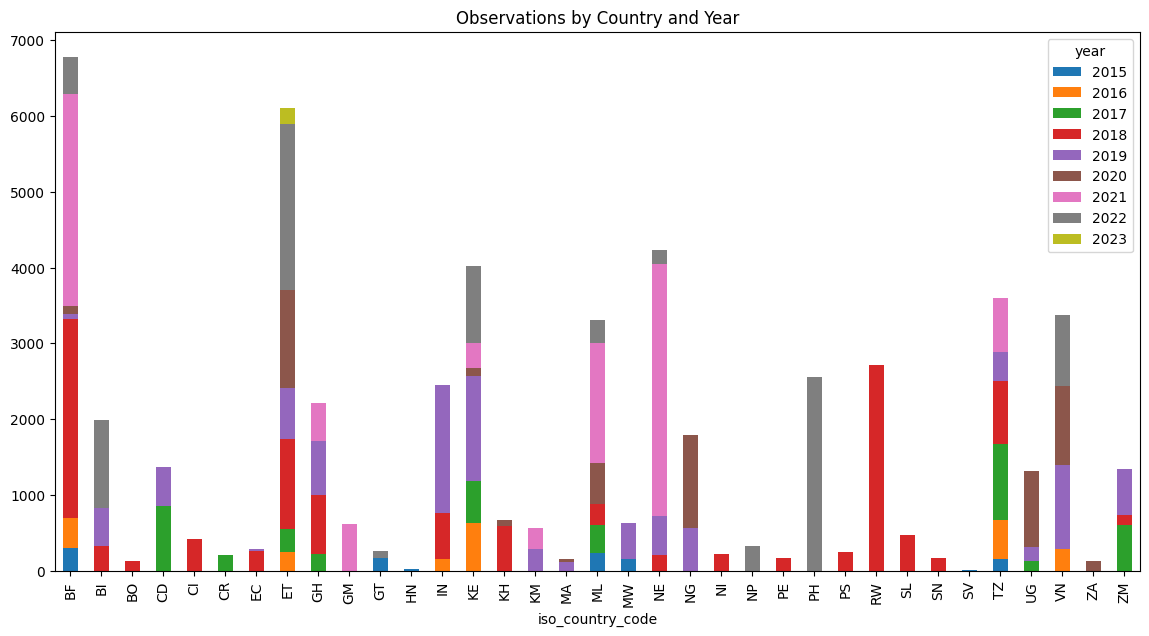

In [5]:
obs_by_country_year = df.groupby(['iso_country_code', 'year']).size().unstack(fill_value=0)
obs_by_country_year.plot(kind='bar', stacked=True, figsize=(14, 7), title='Observations by Country and Year')

In [8]:
# null values in crop residue 1
df['crop_residue_use_1'].isna().sum()

9625

In [7]:
df['crop_count'].isna().sum()

5635

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54873 entries, 0 to 54872
Columns: 1599 entries, id_unique to x_duration
dtypes: float64(1027), int64(9), object(563)
memory usage: 669.4+ MB


In [12]:
# drop crop count that are null, meaning drop farmers that don't grow crops
df = df[~df.crop_count.isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49238 entries, 0 to 54872
Columns: 1599 entries, id_unique to x_duration
dtypes: float64(1027), int64(9), object(563)
memory usage: 601.0+ MB


In [17]:
df[df['crop_residue_use_1'].isna()].crop_name_1.value_counts()

crop_name_1
maize          1671
cassava        1273
ground_nuts     421
banana          302
coconut         201
               ... 
cotton            1
patchouli         1
lychee            1
lemon             1
sunflower         1
Name: count, Length: 68, dtype: int64

In [ ]:
# ok just removing all nas in crop residue 1
df = df[~df['crop_residue_use_1'].isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43573 entries, 0 to 54872
Columns: 1599 entries, id_unique to x_duration
dtypes: float64(1027), int64(9), object(563)
memory usage: 531.9+ MB


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
54868    NaN
54869    NaN
54870    NaN
54871    NaN
54872    NaN
Name: crop_name_6, Length: 43573, dtype: object

In [27]:
# now simply check whether all crop_residue_* have the word burn, 
# if even one of em has it, create crop_burning binary as 1
# Create a boolean DataFrame indicating if 'burn' appears in each column

cols = [f'crop_residue_use_{i}' for i in range(1, 9)]

contains_burn = df[cols].astype(str).apply(
    lambda col: col.str.contains(r'\bburn\b', case=False, na=False)
)


df['crop_burning'] = contains_burn.any(axis=1).astype(int)



In [ ]:

cols_to_show = [f'crop_residue_use_{i}' for i in range(1, 9)] + ['crop_burning']

print(df[cols_to_show].tail())


      crop_residue_use_1 crop_residue_use_2 crop_residue_use_3  \
54868               soil               soil               soil   
54869               soil               soil               burn   
54870          soil feed               soil               soil   
54871               soil          soil feed                NaN   
54872               soil               soil                NaN   

      crop_residue_use_4 crop_residue_use_5 crop_residue_use_6  \
54868               soil                NaN                NaN   
54869                NaN                NaN                NaN   
54870                NaN                NaN                NaN   
54871                NaN                NaN                NaN   
54872                NaN                NaN                NaN   

      crop_residue_use_7  crop_residue_use_8  crop_burning  
54868                NaN                 NaN             0  
54869                NaN                 NaN             1  
54870                Na

In [ ]:
# # Define the columns
# cols = [f'crop_residue_use_{i}' for i in range(1, 9)]

# # Filter rows where any of the columns contain 'burn'
# mask = ~df[cols].astype(str).apply(lambda col: col.str.contains(r'\bburn\b', case=False, na=False)).any(axis=1)

# # Show a few of those rows with only the relevant columns
# print(df.loc[mask, cols + ['crop_burning']].head())


  crop_residue_use_1 crop_residue_use_2 crop_residue_use_3 crop_residue_use_4  \
0  soil feed compost  soil feed compost  soil feed compost                NaN   
1          soil feed       soil compost                NaN                NaN   
2          soil feed  soil feed compost                NaN                NaN   
3          feed soil          soil feed          soil feed                NaN   
4          feed soil          soil feed          soil feed                NaN   

  crop_residue_use_5 crop_residue_use_6 crop_residue_use_7  \
0                NaN                NaN                NaN   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3                NaN                NaN                NaN   
4                NaN                NaN                NaN   

   crop_residue_use_8  crop_burning  
0                 NaN             0  
1                 NaN             0  
2                 NaN     

In [32]:
#do i need to remove farmers without livestocks??
# sum up number of livestock deaths

livestock_cols = [f'livestock_died_{i}' for i in range(1, 6)]

df['livestock_died_total'] = df[livestock_cols].sum(axis=1)

In [ ]:

# create a df with just the columns needed
# List of livestock_heads_* columns
livestock_heads_cols = [
    'livestock_heads_sheep',
    'livestock_heads_cattle',
    'livestock_heads_pigs',
    'livestock_heads_goats',
    'livestock_heads_chicken',
    'livestock_heads_rabbits',
    'livestock_heads_otherpoultry',
    'livestock_heads_camel',
    'livestock_heads_guinea_pigs',
    'livestock_heads_oxen',
    'livestock_heads_buffalo',
    'livestock_heads_duck',
    'livestock_heads_geese',
    'livestock_heads_donkeys_horses',
    'livestock_heads_dogs',
    'livestock_heads_bees',
    'livestock_heads_fish'
]

# Base columns
base_cols = ['crop_burning', 'id_unique', 'iso_country_code', 'year', 'livestock_died_total']

# Combine and create the new DataFrame
crop_export_df = df[base_cols + livestock_heads_cols]

In [34]:
# ok sum of heads to get herd_size
crop_export_df['herd_size'] = crop_export_df[livestock_heads_cols].sum(axis=1)

/var/folders/b3/glj_22g92pl25nkdvjvxnzz00000gn/T/ipykernel_71921/2464075352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_export_df['herd_size'] = crop_export_df[livestock_heads_cols].sum(axis=1)


In [36]:
crop_export_df.herd_size.value_counts()

herd_size
0.0         9429
2.0         2156
1.0         1925
3.0         1652
5.0         1483
            ... 
300074.0       1
672.0          1
667.0          1
1212.0         1
424.0          1
Name: count, Length: 486, dtype: int64

In [37]:
# drop the head columns, not needed for analysis
crop_export_df = crop_export_df.drop(columns=livestock_heads_cols)

In [38]:
crop_export_df.to_csv('../data/first_week.csv')

In [39]:
# Filter rows where crop_burning == 1
burning_df = crop_export_df[crop_export_df['crop_burning'] == 1]

# Check counts by year
print(burning_df['year'].value_counts().sort_index())

# To find the year with the maximum number of observations
most_common_year = burning_df['year'].value_counts().idxmax()
print(f"Year with the most crop_burning observations: {most_common_year}")

year
2015      64
2016     217
2017     376
2018    2647
2019    1207
2020     923
2021     515
2022     618
2023      84
Name: count, dtype: int64
Year with the most crop_burning observations: 2018
